In [114]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [115]:
iris = load_iris(as_frame=True)
df = iris.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [116]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
k_values = [1, 3, 5, 7]
accuracies = {}
for k in k_values:
    kn_classifier = KNeighborsClassifier(n_neighbors=k)
    kn_classifier.fit(X_train, y_train)
    y_pred = kn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[k] = accuracy
print(accuracies)

{1: 1.0, 3: 1.0, 5: 1.0, 7: 0.9666666666666667}


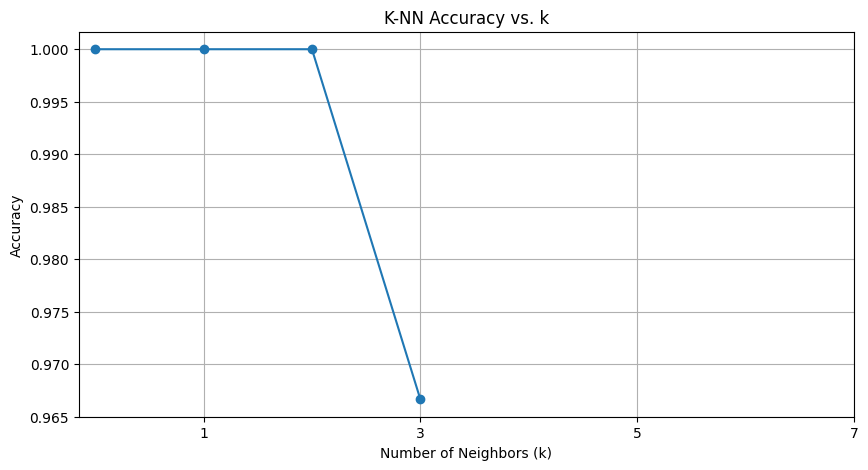

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(accuracies.values(), marker='o')
plt.title('K-NN Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [119]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic_model = logistic_model.predict(X_test)
accuracy_logistic_model = accuracy_score(y_test, y_pred_logistic_model)
accuracies['Logistic Regression'] = accuracy_logistic_model

print(f'Accuracy of Logistic Regression: {accuracy_logistic_model}')

Accuracy of Logistic Regression: 1.0


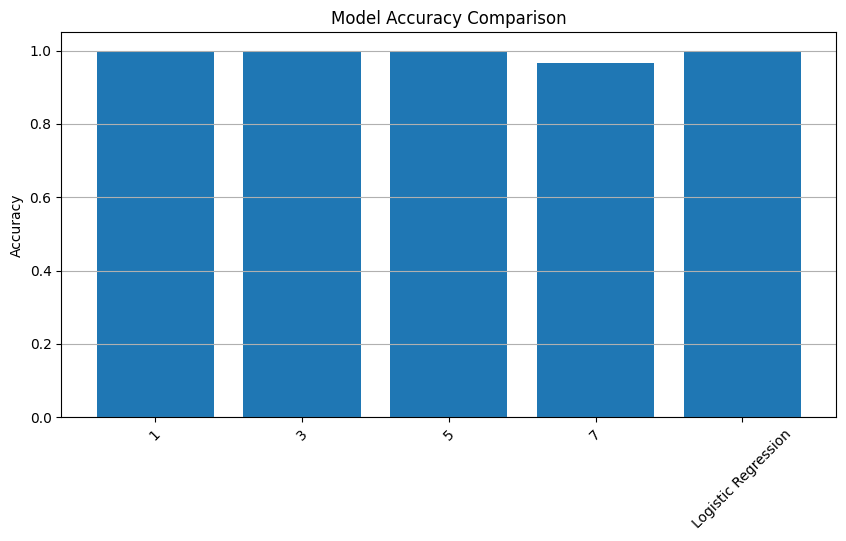

In [120]:
accuracies_str = {str(k): v for k, v in accuracies.items()}

plt.figure(figsize=(10, 5))
plt.bar(accuracies_str.keys(), accuracies_str.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()